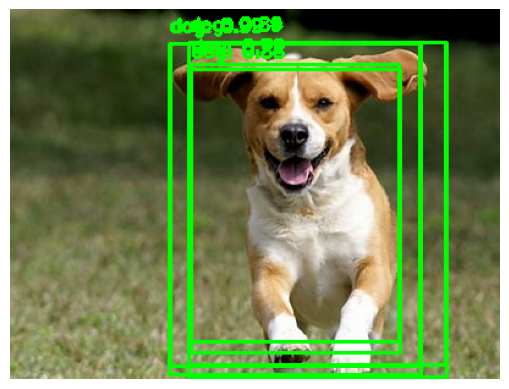

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load YOLOv3 network
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

# Load COCO class labels
with open("coco.names", "r") as f:
    classes = f.read().strip().split("\n")

# Load input image
image_path = "image.jpg"  # Provide the correct path to your image
image = cv2.imread(image_path)

# Get image dimensions
height, width = image.shape[:2]

# Create blob from input image
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)

# Set input blob for the network
net.setInput(blob)

# Get output layer names
output_layer_names = net.getUnconnectedOutLayersNames()

# Forward pass through the network
outputs = net.forward(output_layer_names)

# Lists to store information about detected objects
object_boxes = []
object_confidences = []
object_labels = []

# Process the outputs
for output in outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if confidence > 0.5:  # Adjust the confidence threshold as needed
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Calculate bounding box coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            # Append information to the lists
            object_boxes.append((x, y, x + w, y + h))
            object_confidences.append(confidence)
            object_labels.append(classes[class_id])

# Draw bounding boxes and labels for detected objects
for i in range(len(object_boxes)):
    x, y, x_end, y_end = object_boxes[i]
    confidence = object_confidences[i]
    label = object_labels[i]

    # Draw bounding box
    color = (0, 255, 0)  # Green color
    cv2.rectangle(image, (x, y), (x_end, y_end), color, 2)

    # Draw label
    label_text = f"{label}: {confidence:.2f}"
    cv2.putText(image, label_text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Display the result
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.show()


In [ ]:
import cv2
import numpy as np

net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

with open("coco.names", "r") as f:
    classes = f.read().strip().split("\n")

video_path = "4.mp4" 
cap = cv2.VideoCapture(video_path)


fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))


fourcc = cv2.VideoWriter_fourcc(*"XVID")
out = cv2.VideoWriter("output_video.avi", fourcc, fps, (width, height))

while True:
    ret, frame = cap.read()

    if not ret:
        break

    height, width = frame.shape[:2]

    blob = cv2.dnn.blobFromImage(frame, 1/255.0, (416, 416), swapRB=True, crop=False)

    net.setInput(blob)

    output_layer_names = net.getUnconnectedOutLayersNames()

    outputs = net.forward(output_layer_names)

    object_boxes = []
    object_confidences = []
    object_labels = []

    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > 0.5: 
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                object_boxes.append((x, y, x + w, y + h))
                object_confidences.append(confidence)
                object_labels.append(classes[class_id])

    for i in range(len(object_boxes)):
        x, y, x_end, y_end = object_boxes[i]
        confidence = object_confidences[i]
        label = object_labels[i]

        color = (0, 255, 0)  # Green color
        cv2.rectangle(frame, (x, y), (x_end, y_end), color, 2)

        label_text = f"{label}: {confidence:.2f}"
        cv2.putText(frame, label_text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    out.write(frame)

    cv2.imshow("Object Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
out.release()

cv2.destroyAllWindows()
